### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

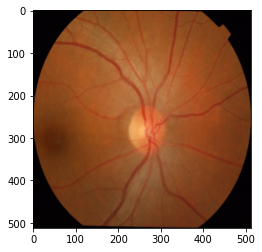

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
hue_channel_train = convert_to_hsv(0, img_train)
len(hue_channel_train)

50

### Test images

In [5]:
hue_channel_test = convert_to_hsv(0, img_test)
len(hue_channel_test)

51

#### Generator of augmented data:

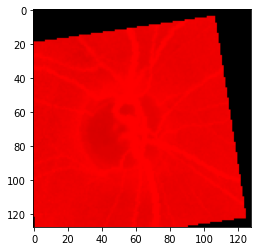

In [6]:
gen = data_generator(hue_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


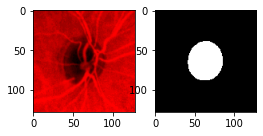

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(hue_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(hue_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_hue', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 26s 243ms/step - loss: 1.5641 - mean_IOU_gpu: 0.0176 - dice_metric: 0.0339 - val_loss: 1.4369 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 25s 251ms/step - loss: 1.5428 - mean_IOU_gpu: 9.8546e-06 - dice_metric: 1.9690e-05 - val_loss: 1.3789 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 31s 312ms/step - loss: 1.4320 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3421 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 33s 330ms/step - loss: 1.4957 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3329 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 44s 447ms/step - loss: 1.3960 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_lo

99/99 [==============================] - 46s 469ms/step - loss: 0.3712 - mean_IOU_gpu: 0.5145 - dice_metric: 0.6631 - val_loss: 1.0245 - val_mean_IOU_gpu: 0.0944 - val_dice_metric: 0.1401
Epoch 41/500
99/99 [==============================] - 46s 463ms/step - loss: 0.3411 - mean_IOU_gpu: 0.5329 - dice_metric: 0.6812 - val_loss: 0.6383 - val_mean_IOU_gpu: 0.2609 - val_dice_metric: 0.3599
Epoch 42/500
99/99 [==============================] - 46s 465ms/step - loss: 0.3172 - mean_IOU_gpu: 0.5474 - dice_metric: 0.6961 - val_loss: 0.8699 - val_mean_IOU_gpu: 0.1715 - val_dice_metric: 0.2456
Epoch 43/500
99/99 [==============================] - 45s 459ms/step - loss: 0.3216 - mean_IOU_gpu: 0.5435 - dice_metric: 0.6924 - val_loss: 0.4871 - val_mean_IOU_gpu: 0.4134 - val_dice_metric: 0.5261
Epoch 44/500
99/99 [==============================] - 46s 465ms/step - loss: 0.3674 - mean_IOU_gpu: 0.5117 - dice_metric: 0.6608 - val_loss: 0.9170 - val_mean_IOU_gpu: 0.0868 - val_dice_metric: 0.1279
Epoch 45

Epoch 81/500
99/99 [==============================] - 46s 467ms/step - loss: 0.3005 - mean_IOU_gpu: 0.5587 - dice_metric: 0.7042 - val_loss: 0.3720 - val_mean_IOU_gpu: 0.5001 - val_dice_metric: 0.6190
Epoch 82/500
99/99 [==============================] - 45s 454ms/step - loss: 0.2819 - mean_IOU_gpu: 0.5743 - dice_metric: 0.7172 - val_loss: 0.2972 - val_mean_IOU_gpu: 0.6156 - val_dice_metric: 0.7221
Epoch 83/500
99/99 [==============================] - 47s 471ms/step - loss: 0.2786 - mean_IOU_gpu: 0.5841 - dice_metric: 0.7238 - val_loss: 0.3119 - val_mean_IOU_gpu: 0.5886 - val_dice_metric: 0.6972
Epoch 84/500
99/99 [==============================] - 46s 467ms/step - loss: 0.2895 - mean_IOU_gpu: 0.5671 - dice_metric: 0.7116 - val_loss: 0.3789 - val_mean_IOU_gpu: 0.5164 - val_dice_metric: 0.6341
Epoch 85/500
99/99 [==============================] - 47s 474ms/step - loss: 0.2608 - mean_IOU_gpu: 0.5830 - dice_metric: 0.7277 - val_loss: 0.3777 - val_mean_IOU_gpu: 0.5245 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 47s 473ms/step - loss: 0.2887 - mean_IOU_gpu: 0.5541 - dice_metric: 0.7035 - val_loss: 0.3127 - val_mean_IOU_gpu: 0.6120 - val_dice_metric: 0.7333
Epoch 123/500
99/99 [==============================] - 46s 465ms/step - loss: 0.2498 - mean_IOU_gpu: 0.5997 - dice_metric: 0.7383 - val_loss: 0.3370 - val_mean_IOU_gpu: 0.5646 - val_dice_metric: 0.6807
Epoch 124/500
99/99 [==============================] - 46s 464ms/step - loss: 0.3022 - mean_IOU_gpu: 0.5589 - dice_metric: 0.7024 - val_loss: 0.3356 - val_mean_IOU_gpu: 0.5647 - val_dice_metric: 0.6804
Epoch 125/500
99/99 [==============================] - 46s 470ms/step - loss: 0.2703 - mean_IOU_gpu: 0.5667 - dice_metric: 0.7129 - val_loss: 0.3300 - val_mean_IOU_gpu: 0.5729 - val_dice_metric: 0.6867
Epoch 126/500
99/99 [==============================] - 47s 476ms/step - loss: 0.2779 - mean_IOU_gpu: 0.5806 - dice_metric: 0.7225 - val_loss: 0.3896 - val_mean_IOU_gpu: 0.5221 - val_dice_metri

99/99 [==============================] - 47s 470ms/step - loss: 0.2544 - mean_IOU_gpu: 0.5943 - dice_metric: 0.7353 - val_loss: 0.3054 - val_mean_IOU_gpu: 0.5610 - val_dice_metric: 0.6917
Epoch 163/500
99/99 [==============================] - 47s 475ms/step - loss: 0.2887 - mean_IOU_gpu: 0.5548 - dice_metric: 0.7030 - val_loss: 0.3296 - val_mean_IOU_gpu: 0.5904 - val_dice_metric: 0.7065
Epoch 164/500
99/99 [==============================] - 47s 471ms/step - loss: 0.2915 - mean_IOU_gpu: 0.5506 - dice_metric: 0.6994 - val_loss: 0.3189 - val_mean_IOU_gpu: 0.5503 - val_dice_metric: 0.6915
Epoch 165/500
99/99 [==============================] - 47s 471ms/step - loss: 0.3032 - mean_IOU_gpu: 0.5575 - dice_metric: 0.7033 - val_loss: 0.3170 - val_mean_IOU_gpu: 0.5516 - val_dice_metric: 0.6925
Epoch 166/500
99/99 [==============================] - 47s 477ms/step - loss: 0.2621 - mean_IOU_gpu: 0.5949 - dice_metric: 0.7330 - val_loss: 0.3023 - val_mean_IOU_gpu: 0.5793 - val_dice_metric: 0.7160
Epoc

Epoch 203/500
99/99 [==============================] - 47s 479ms/step - loss: 0.2913 - mean_IOU_gpu: 0.5560 - dice_metric: 0.7019 - val_loss: 0.3349 - val_mean_IOU_gpu: 0.5486 - val_dice_metric: 0.6830
Epoch 204/500
99/99 [==============================] - 49s 491ms/step - loss: 0.2508 - mean_IOU_gpu: 0.5998 - dice_metric: 0.7394 - val_loss: 0.3276 - val_mean_IOU_gpu: 0.5407 - val_dice_metric: 0.6760
Epoch 205/500
99/99 [==============================] - 48s 487ms/step - loss: 0.2372 - mean_IOU_gpu: 0.6006 - dice_metric: 0.7420 - val_loss: 0.3092 - val_mean_IOU_gpu: 0.5776 - val_dice_metric: 0.7071
Epoch 206/500
99/99 [==============================] - 47s 477ms/step - loss: 0.2535 - mean_IOU_gpu: 0.5920 - dice_metric: 0.7342 - val_loss: 0.3348 - val_mean_IOU_gpu: 0.5238 - val_dice_metric: 0.6617
Epoch 207/500
99/99 [==============================] - 47s 477ms/step - loss: 0.2498 - mean_IOU_gpu: 0.5893 - dice_metric: 0.7325 - val_loss: 0.3363 - val_mean_IOU_gpu: 0.5239 - val_dice_metri

99/99 [==============================] - 47s 476ms/step - loss: 0.2570 - mean_IOU_gpu: 0.5967 - dice_metric: 0.7358 - val_loss: 0.3842 - val_mean_IOU_gpu: 0.4575 - val_dice_metric: 0.6049
Epoch 244/500
99/99 [==============================] - 47s 473ms/step - loss: 0.2692 - mean_IOU_gpu: 0.5721 - dice_metric: 0.7180 - val_loss: 0.3899 - val_mean_IOU_gpu: 0.4571 - val_dice_metric: 0.6052
Epoch 245/500
99/99 [==============================] - 48s 481ms/step - loss: 0.2630 - mean_IOU_gpu: 0.5799 - dice_metric: 0.7230 - val_loss: 0.4106 - val_mean_IOU_gpu: 0.4344 - val_dice_metric: 0.5843
Epoch 246/500
99/99 [==============================] - 48s 484ms/step - loss: 0.2647 - mean_IOU_gpu: 0.5867 - dice_metric: 0.7269 - val_loss: 0.3475 - val_mean_IOU_gpu: 0.4965 - val_dice_metric: 0.6370
Epoch 247/500
99/99 [==============================] - 48s 481ms/step - loss: 0.2532 - mean_IOU_gpu: 0.5872 - dice_metric: 0.7307 - val_loss: 0.3758 - val_mean_IOU_gpu: 0.4650 - val_dice_metric: 0.6103
Epoc

Epoch 284/500
99/99 [==============================] - 47s 474ms/step - loss: 0.2346 - mean_IOU_gpu: 0.6062 - dice_metric: 0.7470 - val_loss: 0.3943 - val_mean_IOU_gpu: 0.4457 - val_dice_metric: 0.5918
Epoch 285/500
99/99 [==============================] - 48s 482ms/step - loss: 0.2382 - mean_IOU_gpu: 0.6079 - dice_metric: 0.7470 - val_loss: 0.4153 - val_mean_IOU_gpu: 0.4274 - val_dice_metric: 0.5752
Epoch 286/500
99/99 [==============================] - 48s 482ms/step - loss: 0.2190 - mean_IOU_gpu: 0.6375 - dice_metric: 0.7682 - val_loss: 0.4216 - val_mean_IOU_gpu: 0.4206 - val_dice_metric: 0.5690
Epoch 287/500
99/99 [==============================] - 48s 482ms/step - loss: 0.2577 - mean_IOU_gpu: 0.5913 - dice_metric: 0.7323 - val_loss: 0.4324 - val_mean_IOU_gpu: 0.4130 - val_dice_metric: 0.5616
Epoch 288/500
99/99 [==============================] - 48s 488ms/step - loss: 0.2618 - mean_IOU_gpu: 0.5794 - dice_metric: 0.7244 - val_loss: 0.4036 - val_mean_IOU_gpu: 0.4371 - val_dice_metri

99/99 [==============================] - 47s 477ms/step - loss: 0.2414 - mean_IOU_gpu: 0.5984 - dice_metric: 0.7397 - val_loss: 0.4684 - val_mean_IOU_gpu: 0.3952 - val_dice_metric: 0.5447
Epoch 325/500
99/99 [==============================] - 35s 354ms/step - loss: 0.2339 - mean_IOU_gpu: 0.6102 - dice_metric: 0.7491 - val_loss: 0.5893 - val_mean_IOU_gpu: 0.2983 - val_dice_metric: 0.4456
Epoch 326/500
99/99 [==============================] - 41s 415ms/step - loss: 0.2824 - mean_IOU_gpu: 0.5698 - dice_metric: 0.7133 - val_loss: 0.4164 - val_mean_IOU_gpu: 0.4267 - val_dice_metric: 0.5745
Epoch 327/500
99/99 [==============================] - 47s 473ms/step - loss: 0.2373 - mean_IOU_gpu: 0.6124 - dice_metric: 0.7503 - val_loss: 0.4540 - val_mean_IOU_gpu: 0.3955 - val_dice_metric: 0.5469
Epoch 328/500
99/99 [==============================] - 47s 473ms/step - loss: 0.2357 - mean_IOU_gpu: 0.6097 - dice_metric: 0.7501 - val_loss: 0.4589 - val_mean_IOU_gpu: 0.3917 - val_dice_metric: 0.5448
Epoc

Epoch 365/500
99/99 [==============================] - 47s 475ms/step - loss: 0.2175 - mean_IOU_gpu: 0.6285 - dice_metric: 0.7639 - val_loss: 0.4583 - val_mean_IOU_gpu: 0.3898 - val_dice_metric: 0.5406
Epoch 366/500
99/99 [==============================] - 47s 475ms/step - loss: 0.2207 - mean_IOU_gpu: 0.6265 - dice_metric: 0.7617 - val_loss: 0.4854 - val_mean_IOU_gpu: 0.3806 - val_dice_metric: 0.5301
Epoch 367/500
99/99 [==============================] - 47s 472ms/step - loss: 0.2504 - mean_IOU_gpu: 0.5957 - dice_metric: 0.7366 - val_loss: 0.4534 - val_mean_IOU_gpu: 0.4076 - val_dice_metric: 0.5567
Epoch 368/500
99/99 [==============================] - 47s 475ms/step - loss: 0.2142 - mean_IOU_gpu: 0.6342 - dice_metric: 0.7683 - val_loss: 0.4125 - val_mean_IOU_gpu: 0.4205 - val_dice_metric: 0.5699
Epoch 369/500
99/99 [==============================] - 47s 476ms/step - loss: 0.2426 - mean_IOU_gpu: 0.6049 - dice_metric: 0.7446 - val_loss: 0.4484 - val_mean_IOU_gpu: 0.4024 - val_dice_metri

99/99 [==============================] - 47s 475ms/step - loss: 0.2129 - mean_IOU_gpu: 0.6429 - dice_metric: 0.7734 - val_loss: 0.4542 - val_mean_IOU_gpu: 0.4063 - val_dice_metric: 0.5521
Epoch 406/500
99/99 [==============================] - 47s 473ms/step - loss: 0.1871 - mean_IOU_gpu: 0.6640 - dice_metric: 0.7908 - val_loss: 0.4684 - val_mean_IOU_gpu: 0.3924 - val_dice_metric: 0.5403
Epoch 407/500
99/99 [==============================] - 47s 478ms/step - loss: 0.2145 - mean_IOU_gpu: 0.6275 - dice_metric: 0.7649 - val_loss: 0.3881 - val_mean_IOU_gpu: 0.4640 - val_dice_metric: 0.6064
Epoch 408/500
99/99 [==============================] - 47s 474ms/step - loss: 0.2271 - mean_IOU_gpu: 0.6134 - dice_metric: 0.7523 - val_loss: 0.4185 - val_mean_IOU_gpu: 0.4415 - val_dice_metric: 0.5870
Epoch 409/500
99/99 [==============================] - 47s 480ms/step - loss: 0.2441 - mean_IOU_gpu: 0.6055 - dice_metric: 0.7436 - val_loss: 0.3237 - val_mean_IOU_gpu: 0.5322 - val_dice_metric: 0.6658
Epoc

Epoch 446/500
99/99 [==============================] - 47s 476ms/step - loss: 0.2140 - mean_IOU_gpu: 0.6361 - dice_metric: 0.7691 - val_loss: 0.4129 - val_mean_IOU_gpu: 0.4437 - val_dice_metric: 0.5946
Epoch 447/500
99/99 [==============================] - 47s 472ms/step - loss: 0.2303 - mean_IOU_gpu: 0.6072 - dice_metric: 0.7483 - val_loss: 0.4066 - val_mean_IOU_gpu: 0.4378 - val_dice_metric: 0.5894
Epoch 448/500
99/99 [==============================] - 47s 477ms/step - loss: 0.1979 - mean_IOU_gpu: 0.6572 - dice_metric: 0.7842 - val_loss: 0.4506 - val_mean_IOU_gpu: 0.4034 - val_dice_metric: 0.5563
Epoch 449/500
99/99 [==============================] - 47s 472ms/step - loss: 0.2334 - mean_IOU_gpu: 0.6255 - dice_metric: 0.7579 - val_loss: 0.3850 - val_mean_IOU_gpu: 0.4656 - val_dice_metric: 0.6140
Epoch 450/500
99/99 [==============================] - 46s 469ms/step - loss: 0.2225 - mean_IOU_gpu: 0.6205 - dice_metric: 0.7575 - val_loss: 0.4587 - val_mean_IOU_gpu: 0.4042 - val_dice_metri

99/99 [==============================] - 47s 475ms/step - loss: 0.2017 - mean_IOU_gpu: 0.6524 - dice_metric: 0.7813 - val_loss: 0.3365 - val_mean_IOU_gpu: 0.5288 - val_dice_metric: 0.6607
Epoch 487/500
99/99 [==============================] - 47s 479ms/step - loss: 0.2045 - mean_IOU_gpu: 0.6459 - dice_metric: 0.7756 - val_loss: 0.3313 - val_mean_IOU_gpu: 0.5360 - val_dice_metric: 0.6673
Epoch 488/500
99/99 [==============================] - 48s 481ms/step - loss: 0.2016 - mean_IOU_gpu: 0.6502 - dice_metric: 0.7797 - val_loss: 0.3023 - val_mean_IOU_gpu: 0.5612 - val_dice_metric: 0.6880
Epoch 489/500
99/99 [==============================] - 46s 468ms/step - loss: 0.2208 - mean_IOU_gpu: 0.6244 - dice_metric: 0.7603 - val_loss: 0.3741 - val_mean_IOU_gpu: 0.5025 - val_dice_metric: 0.6371
Epoch 490/500
99/99 [==============================] - 47s 473ms/step - loss: 0.1961 - mean_IOU_gpu: 0.6473 - dice_metric: 0.7796 - val_loss: 0.3694 - val_mean_IOU_gpu: 0.4973 - val_dice_metric: 0.6342
Epoc

### Visual check

image #0


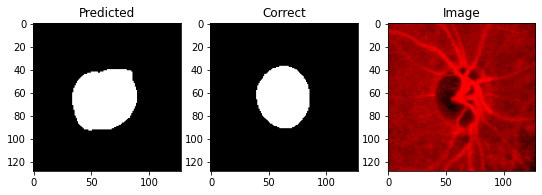

IOU: 0.7511004209518433
Dice: 0.8578610603290676
image #1


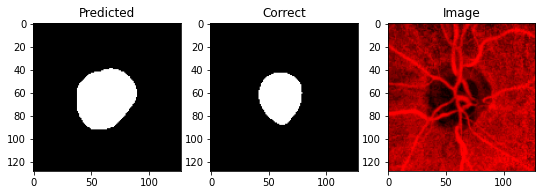

IOU: 0.6080568432807922
Dice: 0.7562628941939287
image #2


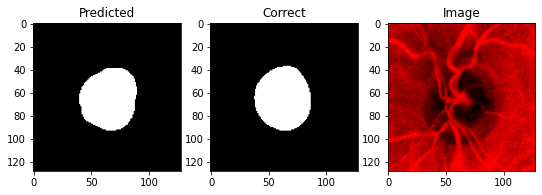

IOU: 0.8609415888786316
Dice: 0.9252752401030686
image #3


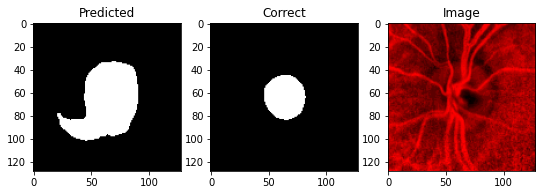

IOU: 0.36535221338272095
Dice: 0.535176499629721
image #4


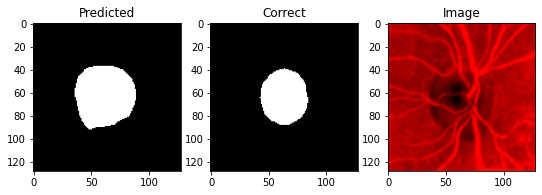

IOU: 0.6756404638290405
Dice: 0.806426535371858
image #5


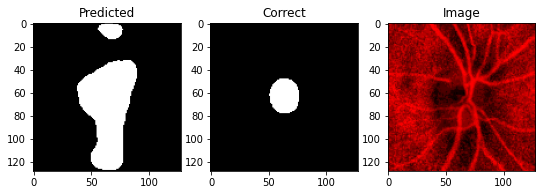

IOU: 0.18978102505207062
Dice: 0.31901840490797545
image #6


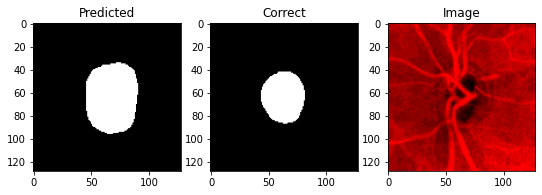

IOU: 0.559148907661438
Dice: 0.7172489082969432
image #7


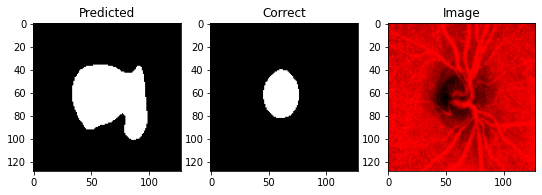

IOU: 0.31929823756217957
Dice: 0.48404255319148937
image #8


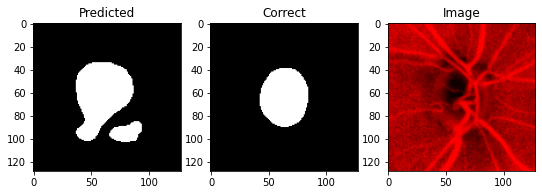

IOU: 0.5227272510528564
Dice: 0.6865671641791045
image #9


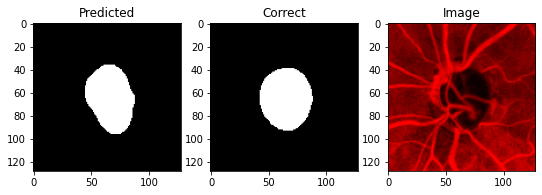

IOU: 0.8290926814079285
Dice: 0.9065616797900262
image #10


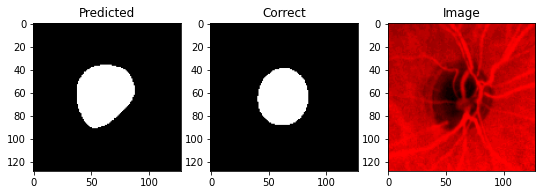

IOU: 0.7480387687683105
Dice: 0.8558606124604012
image #11


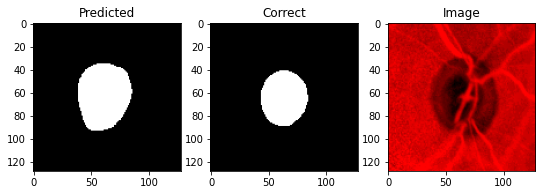

IOU: 0.697428822517395
Dice: 0.821747362726535
image #12


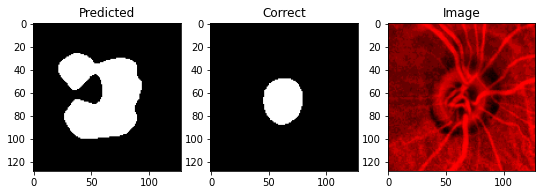

IOU: 0.22376187145709991
Dice: 0.36569511427972323
image #13


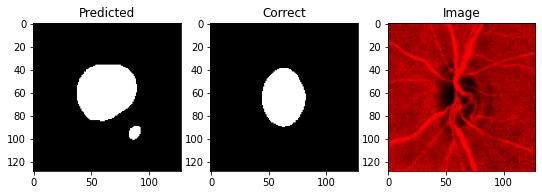

IOU: 0.5944741368293762
Dice: 0.7456679709334824
image #14


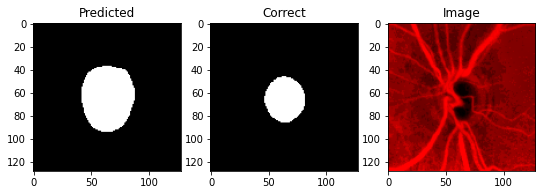

IOU: 0.506881833076477
Dice: 0.672755905511811
image #15


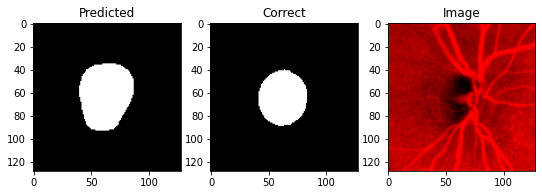

IOU: 0.7192342877388
Dice: 0.8366914103923648
image #16


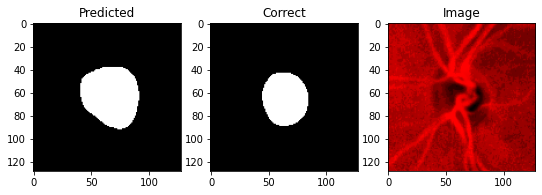

IOU: 0.651397168636322
Dice: 0.7889042995839113
image #17


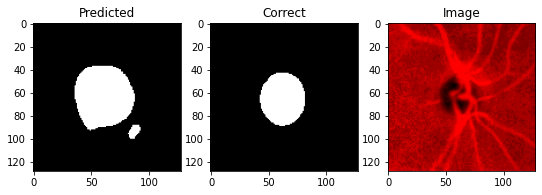

IOU: 0.5988964438438416
Dice: 0.7491372444916379
image #18


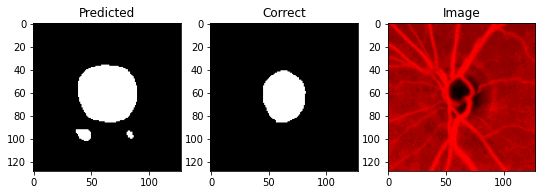

IOU: 0.5743635296821594
Dice: 0.729645390070922
image #19


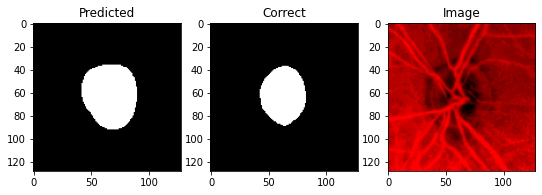

IOU: 0.7115117907524109
Dice: 0.8314424635332253
image #20


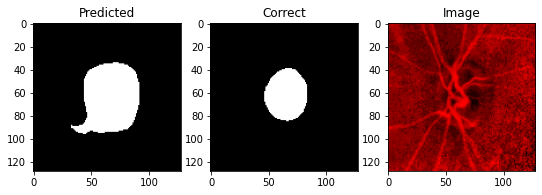

IOU: 0.5057692527770996
Dice: 0.6717752234993615
image #21


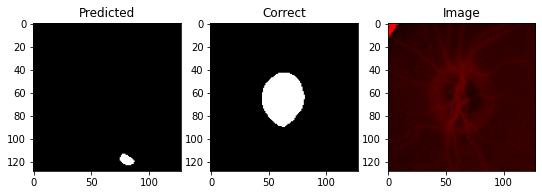

IOU: 0.0
Dice: 0.0
image #22


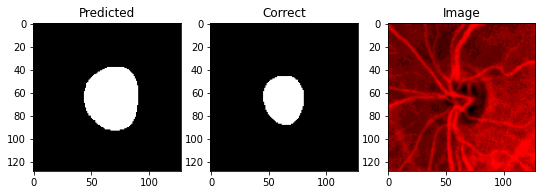

IOU: 0.5658209919929504
Dice: 0.7227147661265668
image #23


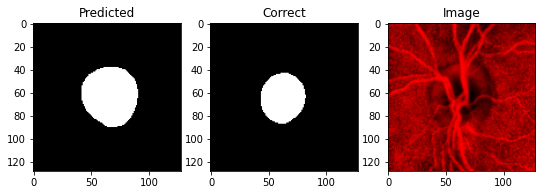

IOU: 0.6444885730743408
Dice: 0.783816425120773
image #24


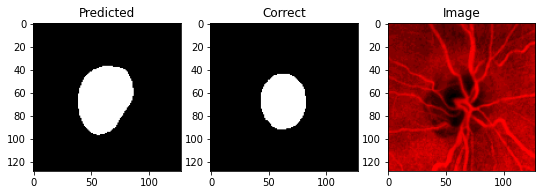

IOU: 0.6562641263008118
Dice: 0.7924631348989624
image #25


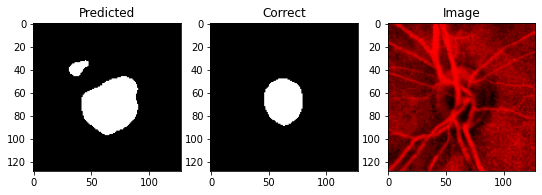

IOU: 0.47951218485832214
Dice: 0.648203099241675
image #26


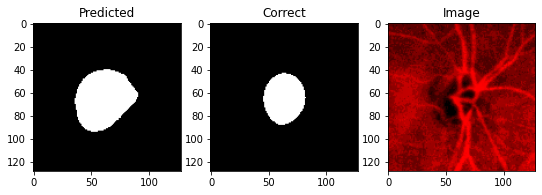

IOU: 0.5923627614974976
Dice: 0.7440047961630696
image #27


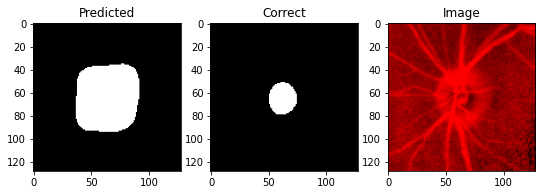

IOU: 0.18636363744735718
Dice: 0.31417624521072796
image #28


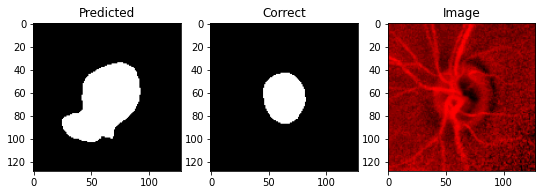

IOU: 0.42842569947242737
Dice: 0.5998571768626517
image #29


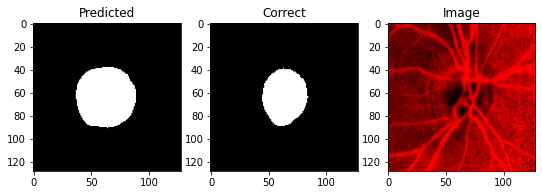

IOU: 0.6728759407997131
Dice: 0.8044541010320478
image #30


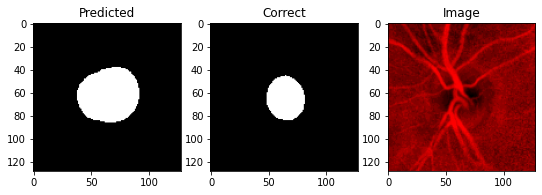

IOU: 0.48946595191955566
Dice: 0.6572368421052631
image #31


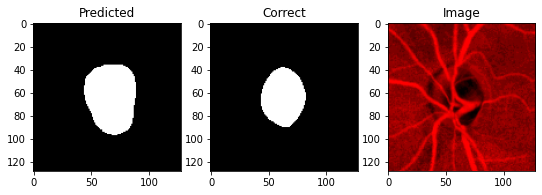

IOU: 0.6466399431228638
Dice: 0.7854054054054054
image #32


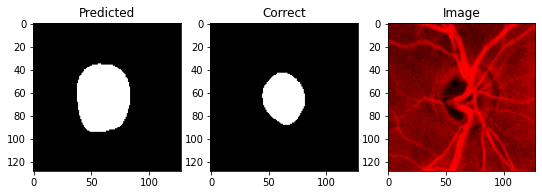

IOU: 0.551525890827179
Dice: 0.7109464082098061
image #33


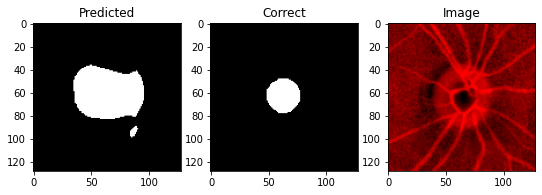

IOU: 0.29044586420059204
Dice: 0.4501480750246792
image #34


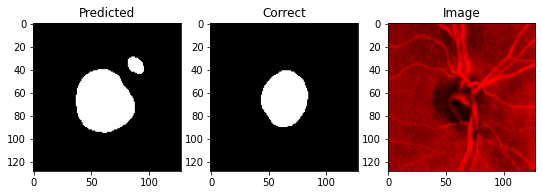

IOU: 0.6130397915840149
Dice: 0.7601049868766404
image #35


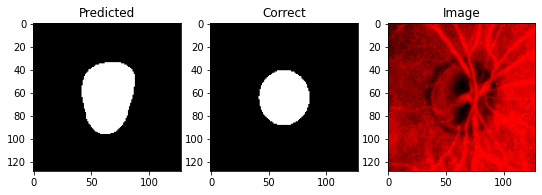

IOU: 0.7064502239227295
Dice: 0.827976343533042
image #36


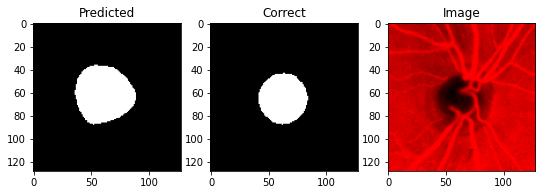

IOU: 0.6808100342750549
Dice: 0.8100975329890993
image #37


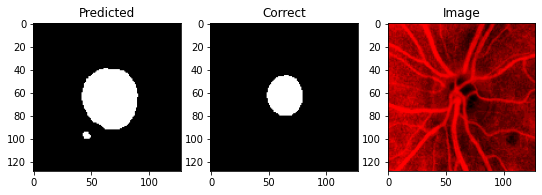

IOU: 0.4145985543727875
Dice: 0.586171310629515
image #38


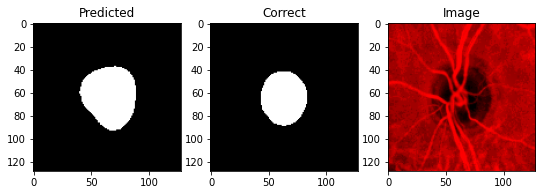

IOU: 0.6997578740119934
Dice: 0.8233618233618234
image #39


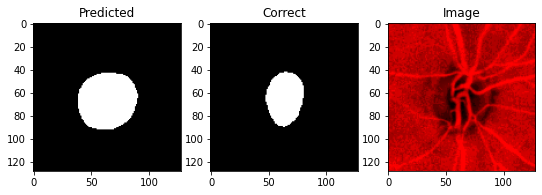

IOU: 0.5735794305801392
Dice: 0.7290123456790123
image #40


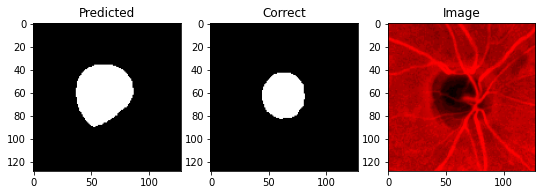

IOU: 0.5764061808586121
Dice: 0.7312914430059994
image #41


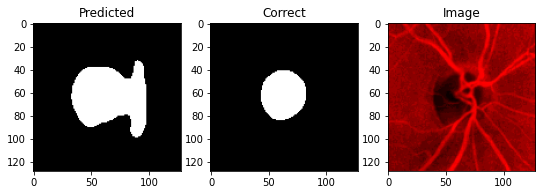

IOU: 0.4571428596973419
Dice: 0.6274509803921569
image #42


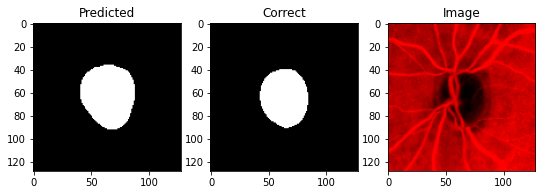

IOU: 0.8010648488998413
Dice: 0.889545821015856
image #43


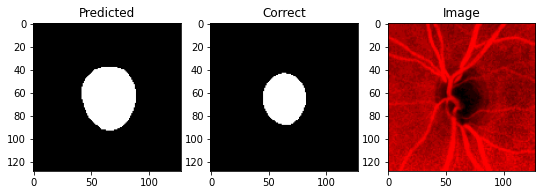

IOU: 0.6350687742233276
Dice: 0.7768098528086512
image #44


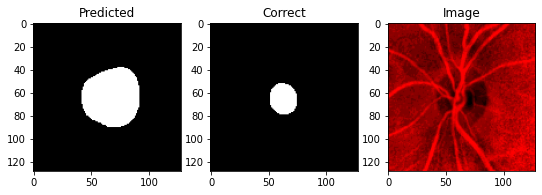

IOU: 0.24638380110263824
Dice: 0.395357833655706
image #45


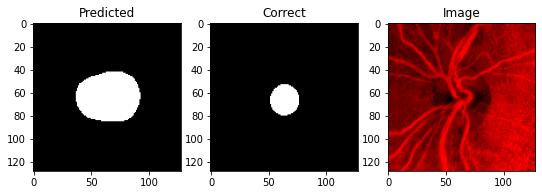

IOU: 0.27097102999687195
Dice: 0.4264
image #46


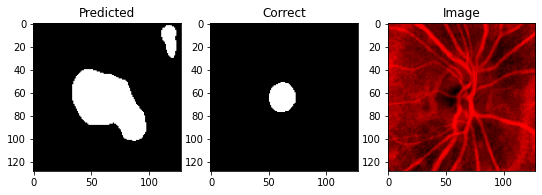

IOU: 0.16816063225269318
Dice: 0.28790669122160834
image #47


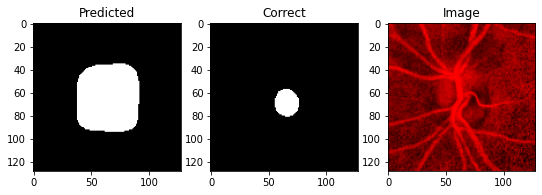

IOU: 0.13727524876594543
Dice: 0.2414107631498936
image #48


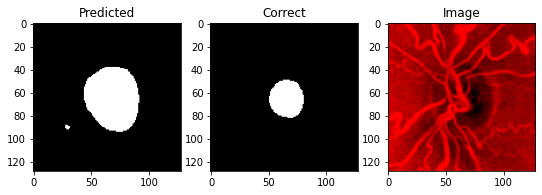

IOU: 0.3666035830974579
Dice: 0.5365178262374524
image #49


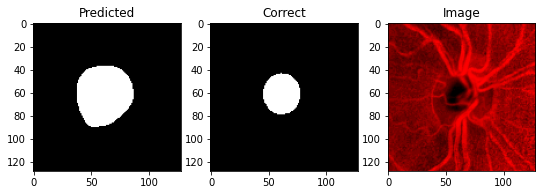

IOU: 0.43640777468681335
Dice: 0.6076377154444069
image #50


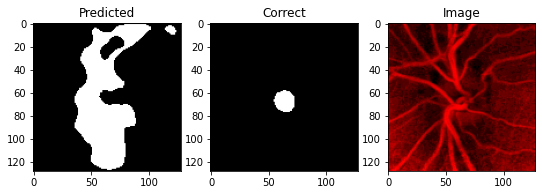

IOU: 0.027804182842373848
Dice: 0.05410404624277457


In [9]:
pred_iou, pred_dice, pred_cup = predict(hue_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.5142865
0.6507519162572907


### Training and Test disc

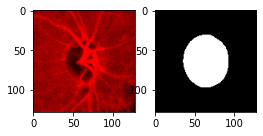

In [11]:
X_test, Z_test = next(data_generator(hue_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(hue_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_hue', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 43s 382ms/step - loss: 1.0110 - mean_IOU_gpu: 0.0237 - dice_metric: 0.0461 - val_loss: 1.0001 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 40s 410ms/step - loss: 1.0283 - mean_IOU_gpu: 0.0043 - dice_metric: 0.0085 - val_loss: 0.9957 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 46s 463ms/step - loss: 1.0082 - mean_IOU_gpu: 5.6334e-04 - dice_metric: 0.0011 - val_loss: 0.9925 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 47s 475ms/step - loss: 0.9891 - mean_IOU_gpu: 5.9442e-05 - dice_metric: 1.1882e-04 - val_loss: 0.9905 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 47s 476ms/step - loss: 1.0204 - mean_IOU_gpu: 1.0964e-05 - dice_metric: 2.1920e-05 - val_loss: 0.9878 -

Epoch 40/500
99/99 [==============================] - 48s 484ms/step - loss: 0.1867 - mean_IOU_gpu: 0.6721 - dice_metric: 0.8004 - val_loss: 1.7452 - val_mean_IOU_gpu: 0.0251 - val_dice_metric: 0.0424
Epoch 41/500
99/99 [==============================] - 48s 488ms/step - loss: 0.2134 - mean_IOU_gpu: 0.6399 - dice_metric: 0.7772 - val_loss: 1.2401 - val_mean_IOU_gpu: 0.0746 - val_dice_metric: 0.1153
Epoch 42/500
99/99 [==============================] - 48s 482ms/step - loss: 0.1982 - mean_IOU_gpu: 0.6580 - dice_metric: 0.7904 - val_loss: 1.6203 - val_mean_IOU_gpu: 0.0343 - val_dice_metric: 0.0564
Epoch 43/500
99/99 [==============================] - 48s 485ms/step - loss: 0.1991 - mean_IOU_gpu: 0.6590 - dice_metric: 0.7908 - val_loss: 2.0622 - val_mean_IOU_gpu: 0.0097 - val_dice_metric: 0.0178
Epoch 44/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1817 - mean_IOU_gpu: 0.6795 - dice_metric: 0.8055 - val_loss: 1.8300 - val_mean_IOU_gpu: 0.0202 - val_dice_metric: 0.

Epoch 81/500
99/99 [==============================] - 48s 486ms/step - loss: 0.1647 - mean_IOU_gpu: 0.6877 - dice_metric: 0.8112 - val_loss: 0.6572 - val_mean_IOU_gpu: 0.2437 - val_dice_metric: 0.3428
Epoch 82/500
99/99 [==============================] - 49s 490ms/step - loss: 0.1809 - mean_IOU_gpu: 0.6710 - dice_metric: 0.7981 - val_loss: 0.5742 - val_mean_IOU_gpu: 0.2794 - val_dice_metric: 0.3886
Epoch 83/500
99/99 [==============================] - 49s 491ms/step - loss: 0.1688 - mean_IOU_gpu: 0.6900 - dice_metric: 0.8116 - val_loss: 0.3304 - val_mean_IOU_gpu: 0.5115 - val_dice_metric: 0.6246
Epoch 84/500
99/99 [==============================] - 49s 495ms/step - loss: 0.1686 - mean_IOU_gpu: 0.6854 - dice_metric: 0.8095 - val_loss: 0.4520 - val_mean_IOU_gpu: 0.3828 - val_dice_metric: 0.5002
Epoch 85/500
99/99 [==============================] - 47s 475ms/step - loss: 0.1604 - mean_IOU_gpu: 0.6949 - dice_metric: 0.8164 - val_loss: 0.6406 - val_mean_IOU_gpu: 0.2586 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 48s 486ms/step - loss: 0.1518 - mean_IOU_gpu: 0.7120 - dice_metric: 0.8276 - val_loss: 0.3628 - val_mean_IOU_gpu: 0.4936 - val_dice_metric: 0.6077
Epoch 123/500
99/99 [==============================] - 48s 485ms/step - loss: 0.1359 - mean_IOU_gpu: 0.7308 - dice_metric: 0.8416 - val_loss: 0.4932 - val_mean_IOU_gpu: 0.3876 - val_dice_metric: 0.5046
Epoch 124/500
99/99 [==============================] - 49s 492ms/step - loss: 0.1605 - mean_IOU_gpu: 0.6966 - dice_metric: 0.8168 - val_loss: 0.3472 - val_mean_IOU_gpu: 0.4985 - val_dice_metric: 0.6135
Epoch 125/500
99/99 [==============================] - 48s 486ms/step - loss: 0.1604 - mean_IOU_gpu: 0.7015 - dice_metric: 0.8189 - val_loss: 0.2324 - val_mean_IOU_gpu: 0.6478 - val_dice_metric: 0.7468
Epoch 126/500
99/99 [==============================] - 48s 484ms/step - loss: 0.1505 - mean_IOU_gpu: 0.7061 - dice_metric: 0.8238 - val_loss: 0.3391 - val_mean_IOU_gpu: 0.5039 - val_dice_metri

99/99 [==============================] - 34s 347ms/step - loss: 0.1254 - mean_IOU_gpu: 0.7458 - dice_metric: 0.8510 - val_loss: 0.1684 - val_mean_IOU_gpu: 0.7533 - val_dice_metric: 0.8406
Epoch 163/500
99/99 [==============================] - 35s 355ms/step - loss: 0.1590 - mean_IOU_gpu: 0.7023 - dice_metric: 0.8192 - val_loss: 0.2018 - val_mean_IOU_gpu: 0.7158 - val_dice_metric: 0.8132
Epoch 164/500
99/99 [==============================] - 34s 344ms/step - loss: 0.1342 - mean_IOU_gpu: 0.7338 - dice_metric: 0.8428 - val_loss: 0.1498 - val_mean_IOU_gpu: 0.7966 - val_dice_metric: 0.8764
Epoch 165/500
99/99 [==============================] - 34s 344ms/step - loss: 0.1305 - mean_IOU_gpu: 0.7355 - dice_metric: 0.8450 - val_loss: 0.1877 - val_mean_IOU_gpu: 0.7374 - val_dice_metric: 0.8288
Epoch 166/500
99/99 [==============================] - 34s 348ms/step - loss: 0.1363 - mean_IOU_gpu: 0.7325 - dice_metric: 0.8421 - val_loss: 0.1504 - val_mean_IOU_gpu: 0.7779 - val_dice_metric: 0.8652
Epoc

Epoch 203/500
99/99 [==============================] - 34s 346ms/step - loss: 0.1236 - mean_IOU_gpu: 0.7504 - dice_metric: 0.8542 - val_loss: 0.1587 - val_mean_IOU_gpu: 0.7262 - val_dice_metric: 0.8336
Epoch 204/500
99/99 [==============================] - 34s 340ms/step - loss: 0.1334 - mean_IOU_gpu: 0.7309 - dice_metric: 0.8415 - val_loss: 0.2005 - val_mean_IOU_gpu: 0.6340 - val_dice_metric: 0.7689
Epoch 205/500
99/99 [==============================] - 32s 329ms/step - loss: 0.1558 - mean_IOU_gpu: 0.7004 - dice_metric: 0.8197 - val_loss: 0.2061 - val_mean_IOU_gpu: 0.6267 - val_dice_metric: 0.7636
Epoch 206/500
99/99 [==============================] - 34s 341ms/step - loss: 0.1256 - mean_IOU_gpu: 0.7470 - dice_metric: 0.8521 - val_loss: 0.1677 - val_mean_IOU_gpu: 0.7239 - val_dice_metric: 0.8319
Epoch 207/500
99/99 [==============================] - 35s 355ms/step - loss: 0.1348 - mean_IOU_gpu: 0.7326 - dice_metric: 0.8426 - val_loss: 0.1821 - val_mean_IOU_gpu: 0.6780 - val_dice_metri

99/99 [==============================] - 33s 338ms/step - loss: 0.1270 - mean_IOU_gpu: 0.7446 - dice_metric: 0.8501 - val_loss: 0.2377 - val_mean_IOU_gpu: 0.5648 - val_dice_metric: 0.7191
Epoch 244/500
99/99 [==============================] - 34s 340ms/step - loss: 0.1372 - mean_IOU_gpu: 0.7278 - dice_metric: 0.8391 - val_loss: 0.2625 - val_mean_IOU_gpu: 0.5355 - val_dice_metric: 0.6951
Epoch 245/500
99/99 [==============================] - 35s 354ms/step - loss: 0.1287 - mean_IOU_gpu: 0.7400 - dice_metric: 0.8477 - val_loss: 0.2722 - val_mean_IOU_gpu: 0.5256 - val_dice_metric: 0.6866
Epoch 246/500
99/99 [==============================] - 34s 346ms/step - loss: 0.1258 - mean_IOU_gpu: 0.7440 - dice_metric: 0.8504 - val_loss: 0.2799 - val_mean_IOU_gpu: 0.5195 - val_dice_metric: 0.6808
Epoch 247/500
99/99 [==============================] - 36s 360ms/step - loss: 0.1192 - mean_IOU_gpu: 0.7534 - dice_metric: 0.8568 - val_loss: 0.2622 - val_mean_IOU_gpu: 0.5404 - val_dice_metric: 0.6955
Epoc

Epoch 284/500
99/99 [==============================] - 34s 340ms/step - loss: 0.1293 - mean_IOU_gpu: 0.7416 - dice_metric: 0.8479 - val_loss: 0.3528 - val_mean_IOU_gpu: 0.4661 - val_dice_metric: 0.6302
Epoch 285/500
99/99 [==============================] - 34s 340ms/step - loss: 0.1201 - mean_IOU_gpu: 0.7564 - dice_metric: 0.8579 - val_loss: 0.3929 - val_mean_IOU_gpu: 0.4343 - val_dice_metric: 0.6005
Epoch 286/500
99/99 [==============================] - 34s 344ms/step - loss: 0.1230 - mean_IOU_gpu: 0.7511 - dice_metric: 0.8547 - val_loss: 0.3062 - val_mean_IOU_gpu: 0.5019 - val_dice_metric: 0.6620
Epoch 287/500
99/99 [==============================] - 34s 341ms/step - loss: 0.1209 - mean_IOU_gpu: 0.7539 - dice_metric: 0.8568 - val_loss: 0.3489 - val_mean_IOU_gpu: 0.4651 - val_dice_metric: 0.6290
Epoch 288/500
99/99 [==============================] - 35s 356ms/step - loss: 0.1218 - mean_IOU_gpu: 0.7492 - dice_metric: 0.8536 - val_loss: 0.4119 - val_mean_IOU_gpu: 0.4213 - val_dice_metri

99/99 [==============================] - 57s 582ms/step - loss: 0.1256 - mean_IOU_gpu: 0.7459 - dice_metric: 0.8513 - val_loss: 0.4627 - val_mean_IOU_gpu: 0.3858 - val_dice_metric: 0.5523
Epoch 325/500
99/99 [==============================] - 77s 781ms/step - loss: 0.1174 - mean_IOU_gpu: 0.7537 - dice_metric: 0.8571 - val_loss: 0.4772 - val_mean_IOU_gpu: 0.3757 - val_dice_metric: 0.5418
Epoch 326/500
99/99 [==============================] - 82s 829ms/step - loss: 0.1239 - mean_IOU_gpu: 0.7454 - dice_metric: 0.8515 - val_loss: 0.4881 - val_mean_IOU_gpu: 0.3709 - val_dice_metric: 0.5370
Epoch 327/500
99/99 [==============================] - 83s 837ms/step - loss: 0.1160 - mean_IOU_gpu: 0.7599 - dice_metric: 0.8607 - val_loss: 0.4445 - val_mean_IOU_gpu: 0.4012 - val_dice_metric: 0.5679
Epoch 328/500
99/99 [==============================] - 84s 850ms/step - loss: 0.1190 - mean_IOU_gpu: 0.7522 - dice_metric: 0.8561 - val_loss: 0.4984 - val_mean_IOU_gpu: 0.3599 - val_dice_metric: 0.5259
Epoc

Epoch 365/500
99/99 [==============================] - 68s 688ms/step - loss: 0.1246 - mean_IOU_gpu: 0.7448 - dice_metric: 0.8506 - val_loss: 0.5442 - val_mean_IOU_gpu: 0.3392 - val_dice_metric: 0.5047
Epoch 366/500
99/99 [==============================] - 71s 716ms/step - loss: 0.1212 - mean_IOU_gpu: 0.7521 - dice_metric: 0.8553 - val_loss: 0.5076 - val_mean_IOU_gpu: 0.3587 - val_dice_metric: 0.5255
Epoch 367/500
99/99 [==============================] - 73s 733ms/step - loss: 0.1270 - mean_IOU_gpu: 0.7387 - dice_metric: 0.8466 - val_loss: 0.6320 - val_mean_IOU_gpu: 0.3013 - val_dice_metric: 0.4609
Epoch 368/500
99/99 [==============================] - 71s 713ms/step - loss: 0.1191 - mean_IOU_gpu: 0.7544 - dice_metric: 0.8575 - val_loss: 0.6006 - val_mean_IOU_gpu: 0.3178 - val_dice_metric: 0.4800
Epoch 369/500
99/99 [==============================] - 72s 729ms/step - loss: 0.1217 - mean_IOU_gpu: 0.7530 - dice_metric: 0.8559 - val_loss: 0.5714 - val_mean_IOU_gpu: 0.3291 - val_dice_metri

99/99 [==============================] - 72s 726ms/step - loss: 0.1196 - mean_IOU_gpu: 0.7511 - dice_metric: 0.8552 - val_loss: 0.4861 - val_mean_IOU_gpu: 0.3831 - val_dice_metric: 0.5490
Epoch 406/500
99/99 [==============================] - 73s 733ms/step - loss: 0.1070 - mean_IOU_gpu: 0.7717 - dice_metric: 0.8688 - val_loss: 0.4682 - val_mean_IOU_gpu: 0.3993 - val_dice_metric: 0.5655
Epoch 407/500
99/99 [==============================] - 69s 698ms/step - loss: 0.1062 - mean_IOU_gpu: 0.7766 - dice_metric: 0.8719 - val_loss: 0.4159 - val_mean_IOU_gpu: 0.4310 - val_dice_metric: 0.5963
Epoch 408/500
99/99 [==============================] - 71s 712ms/step - loss: 0.1166 - mean_IOU_gpu: 0.7571 - dice_metric: 0.8591 - val_loss: 0.4388 - val_mean_IOU_gpu: 0.4158 - val_dice_metric: 0.5817
Epoch 409/500
99/99 [==============================] - 71s 715ms/step - loss: 0.1078 - mean_IOU_gpu: 0.7726 - dice_metric: 0.8694 - val_loss: 0.4723 - val_mean_IOU_gpu: 0.3924 - val_dice_metric: 0.5580
Epoc

Epoch 446/500
99/99 [==============================] - 71s 712ms/step - loss: 0.1134 - mean_IOU_gpu: 0.7637 - dice_metric: 0.8635 - val_loss: 0.4055 - val_mean_IOU_gpu: 0.4539 - val_dice_metric: 0.6170
Epoch 447/500
99/99 [==============================] - 72s 723ms/step - loss: 0.1078 - mean_IOU_gpu: 0.7702 - dice_metric: 0.8682 - val_loss: 0.3686 - val_mean_IOU_gpu: 0.4814 - val_dice_metric: 0.6410
Epoch 448/500
99/99 [==============================] - 73s 736ms/step - loss: 0.1092 - mean_IOU_gpu: 0.7673 - dice_metric: 0.8659 - val_loss: 0.3862 - val_mean_IOU_gpu: 0.4677 - val_dice_metric: 0.6287
Epoch 449/500
99/99 [==============================] - 70s 705ms/step - loss: 0.1088 - mean_IOU_gpu: 0.7733 - dice_metric: 0.8693 - val_loss: 0.3941 - val_mean_IOU_gpu: 0.4617 - val_dice_metric: 0.6225
Epoch 450/500
99/99 [==============================] - 71s 720ms/step - loss: 0.1032 - mean_IOU_gpu: 0.7746 - dice_metric: 0.8713 - val_loss: 0.4071 - val_mean_IOU_gpu: 0.4544 - val_dice_metri

99/99 [==============================] - 57s 577ms/step - loss: 0.1011 - mean_IOU_gpu: 0.7887 - dice_metric: 0.8789 - val_loss: 0.4018 - val_mean_IOU_gpu: 0.4617 - val_dice_metric: 0.6256
Epoch 487/500
99/99 [==============================] - 56s 562ms/step - loss: 0.1054 - mean_IOU_gpu: 0.7779 - dice_metric: 0.8723 - val_loss: 0.3951 - val_mean_IOU_gpu: 0.4679 - val_dice_metric: 0.6315
Epoch 488/500
99/99 [==============================] - 55s 553ms/step - loss: 0.0988 - mean_IOU_gpu: 0.7866 - dice_metric: 0.8787 - val_loss: 0.3413 - val_mean_IOU_gpu: 0.5065 - val_dice_metric: 0.6653
Epoch 489/500
99/99 [==============================] - 55s 556ms/step - loss: 0.1045 - mean_IOU_gpu: 0.7775 - dice_metric: 0.8728 - val_loss: 0.3416 - val_mean_IOU_gpu: 0.5077 - val_dice_metric: 0.6660
Epoch 490/500
99/99 [==============================] - 55s 552ms/step - loss: 0.1065 - mean_IOU_gpu: 0.7744 - dice_metric: 0.8704 - val_loss: 0.3215 - val_mean_IOU_gpu: 0.5266 - val_dice_metric: 0.6819
Epoc

image #0


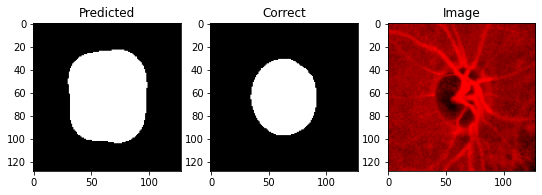

IOU: 0.6245259046554565
Dice: 0.7688715953307393
image #1


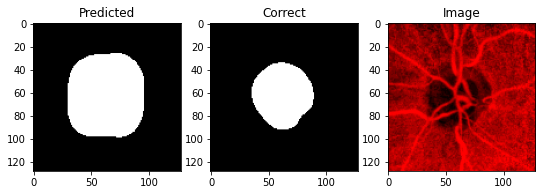

IOU: 0.550783097743988
Dice: 0.7103289977046672
image #2


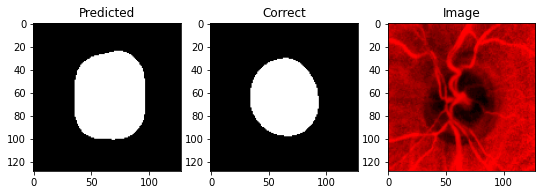

IOU: 0.7732213735580444
Dice: 0.8721092226246866
image #3


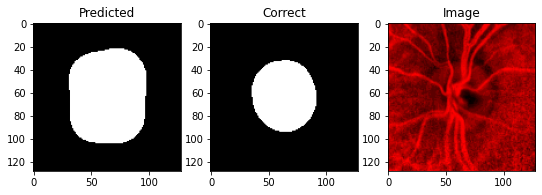

IOU: 0.5709831714630127
Dice: 0.7269118814501191
image #4


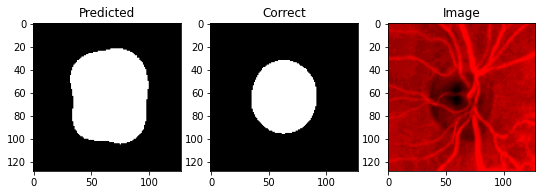

IOU: 0.6031408905982971
Dice: 0.7524490336245697
image #5


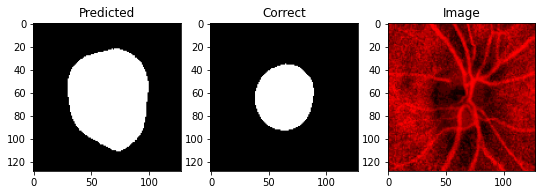

IOU: 0.47271600365638733
Dice: 0.6419649122807017
image #6


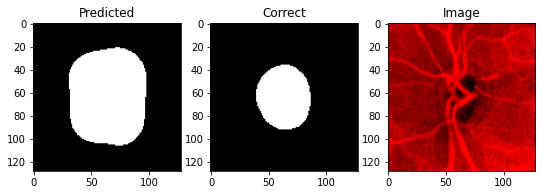

IOU: 0.4273136854171753
Dice: 0.5987663176014919
image #7


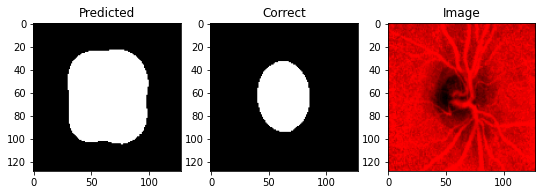

IOU: 0.436836838722229
Dice: 0.6080535042496865
image #8


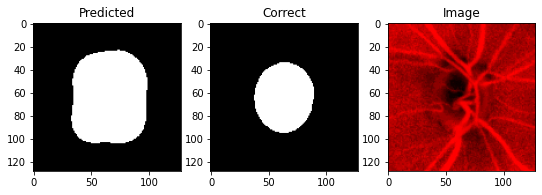

IOU: 0.5324394702911377
Dice: 0.6948913350268134
image #9


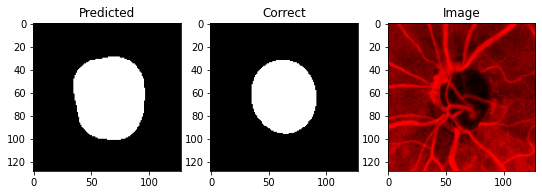

IOU: 0.7692099809646606
Dice: 0.8695519192537086
image #10


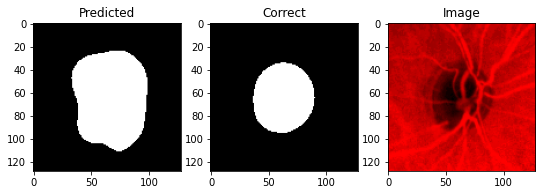

IOU: 0.5521286129951477
Dice: 0.7114469633361321
image #11


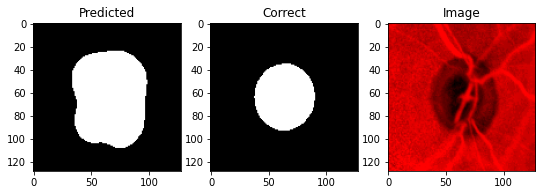

IOU: 0.5166558027267456
Dice: 0.6813092161929372
image #12


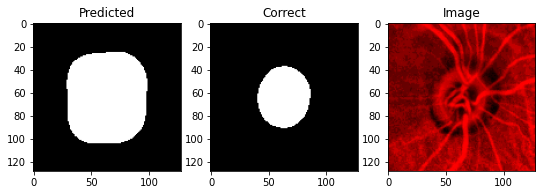

IOU: 0.39600083231925964
Dice: 0.567336089781453
image #13


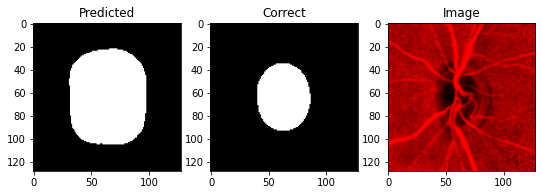

IOU: 0.44720497727394104
Dice: 0.6180257510729614
image #14


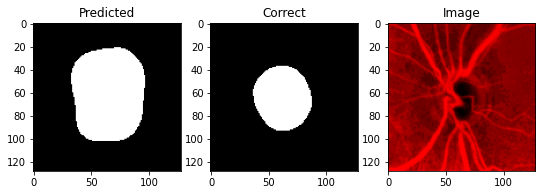

IOU: 0.5049232840538025
Dice: 0.6710286062081559
image #15


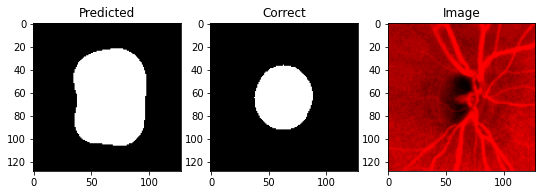

IOU: 0.47710421681404114
Dice: 0.6459994095069382
image #16


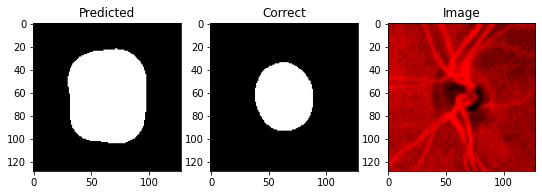

IOU: 0.493633896112442
Dice: 0.6609837898267188
image #17


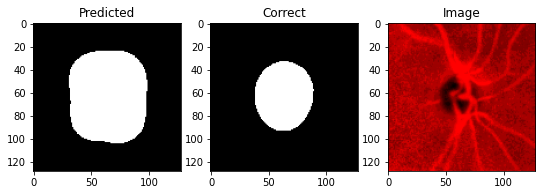

IOU: 0.507283091545105
Dice: 0.673109243697479
image #18


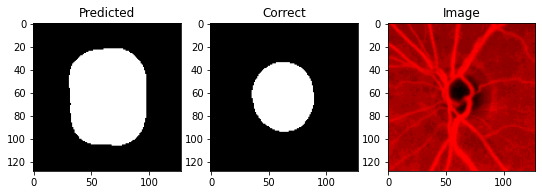

IOU: 0.5183075666427612
Dice: 0.6827438370846731
image #19


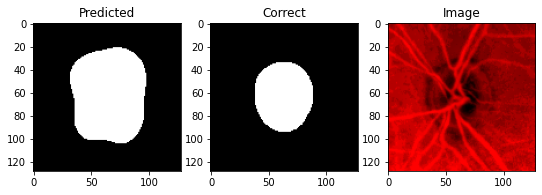

IOU: 0.5338444709777832
Dice: 0.696086832333619
image #20


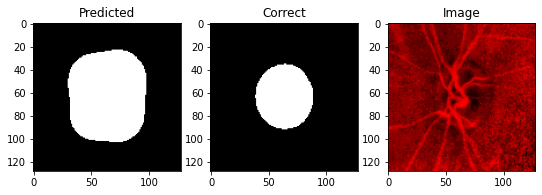

IOU: 0.47297295928001404
Dice: 0.6422018348623854
image #21


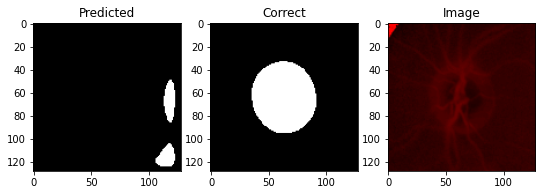

IOU: 0.0
Dice: 0.0
image #22


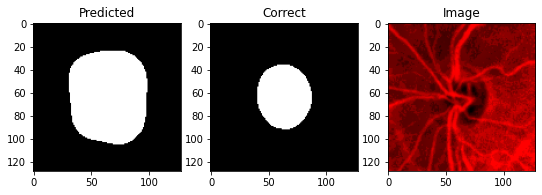

IOU: 0.44260555505752563
Dice: 0.6136196499485218
image #23


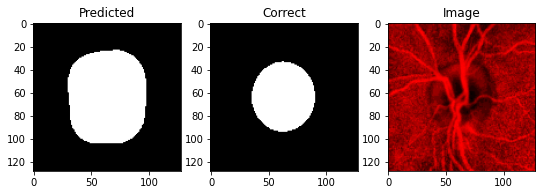

IOU: 0.5464895367622375
Dice: 0.7067484662576687
image #24


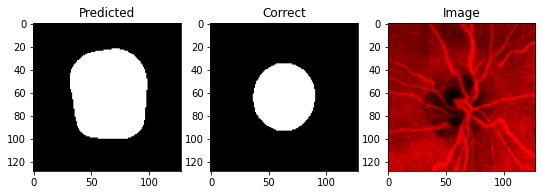

IOU: 0.558532178401947
Dice: 0.7167412971255236
image #25


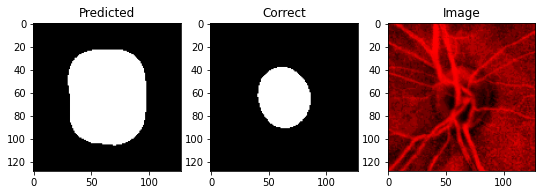

IOU: 0.38548287749290466
Dice: 0.5564599674411721
image #26


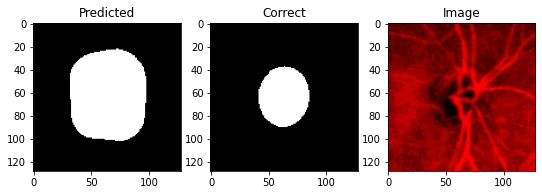

IOU: 0.39924877882003784
Dice: 0.5706616137691457
image #27


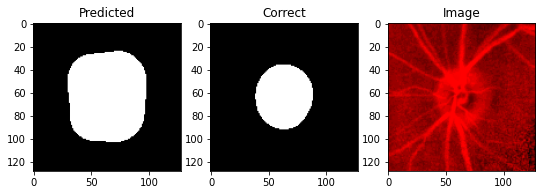

IOU: 0.4727781414985657
Dice: 0.6420222092343658
image #28


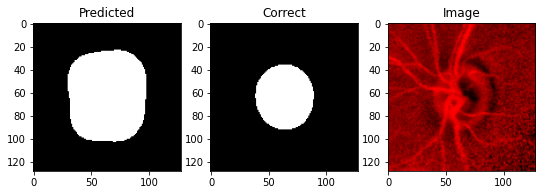

IOU: 0.4822269678115845
Dice: 0.6506789945102571
image #29


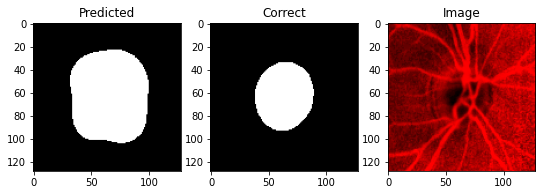

IOU: 0.5068492889404297
Dice: 0.6727272727272727
image #30


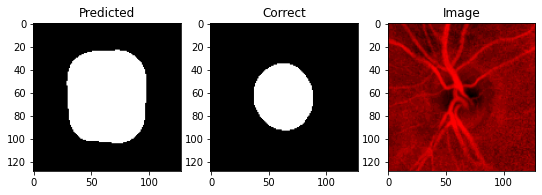

IOU: 0.48104655742645264
Dice: 0.6496035609959661
image #31


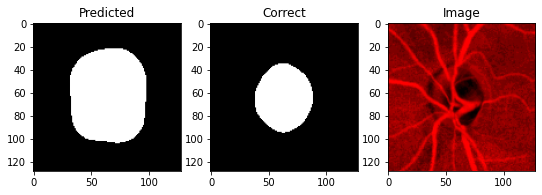

IOU: 0.4900904893875122
Dice: 0.6577996241145005
image #32


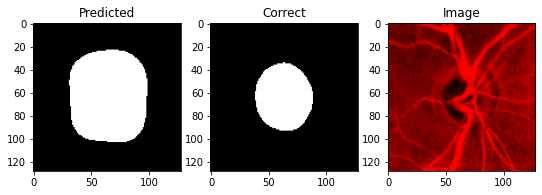

IOU: 0.49050968885421753
Dice: 0.6581771354986408
image #33


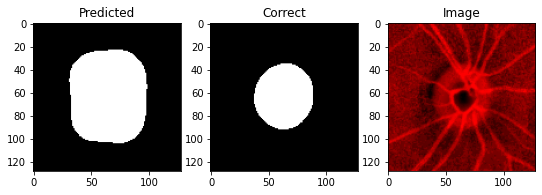

IOU: 0.4835025370121002
Dice: 0.6518391787852865
image #34


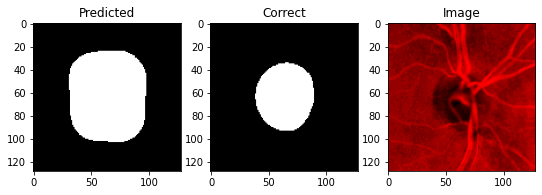

IOU: 0.505145788192749
Dice: 0.6712250712250712
image #35


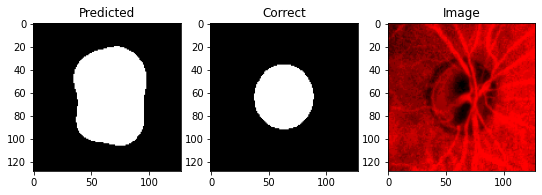

IOU: 0.49977847933769226
Dice: 0.6664697193500738
image #36


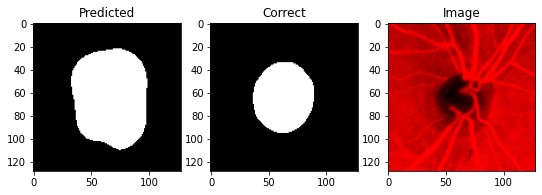

IOU: 0.5429180264472961
Dice: 0.7037548315847598
image #37


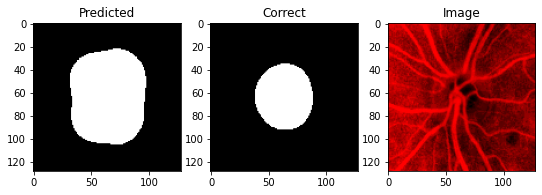

IOU: 0.4877682328224182
Dice: 0.6557046011827492
image #38


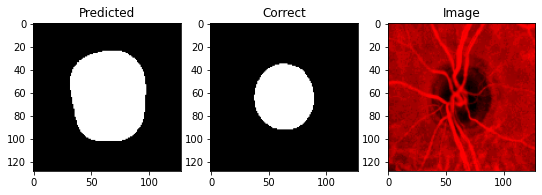

IOU: 0.5413098931312561
Dice: 0.7024024024024024
image #39


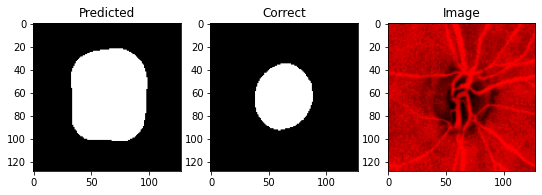

IOU: 0.48281824588775635
Dice: 0.6512170237574697
image #40


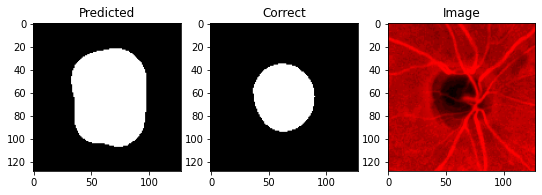

IOU: 0.5188114643096924
Dice: 0.6831808585503166
image #41


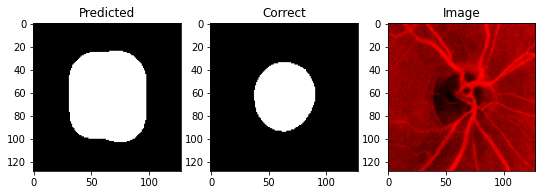

IOU: 0.5306078791618347
Dice: 0.6933296042511536
image #42


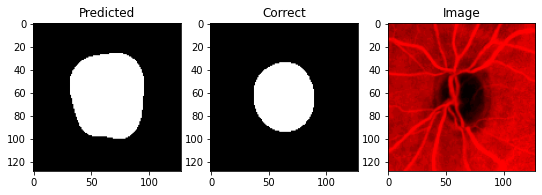

IOU: 0.6322937607765198
Dice: 0.7747303543913714
image #43


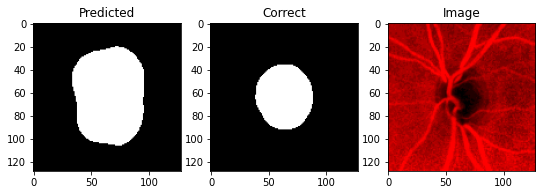

IOU: 0.4981916844844818
Dice: 0.6650573325286663
image #44


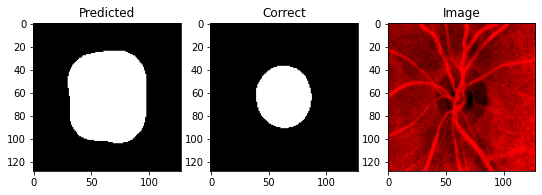

IOU: 0.432810515165329
Dice: 0.6041420118343195
image #45


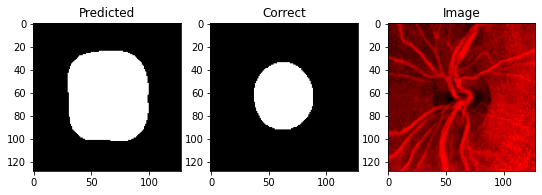

IOU: 0.49099937081336975
Dice: 0.6586178184845962
image #46


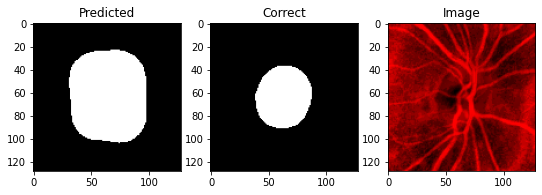

IOU: 0.4482315182685852
Dice: 0.6190053285968028
image #47


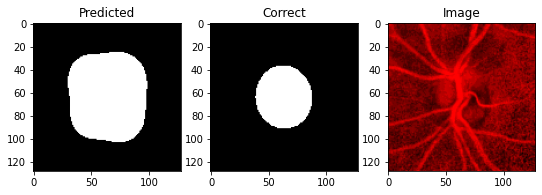

IOU: 0.45525631308555603
Dice: 0.6256716417910447
image #48


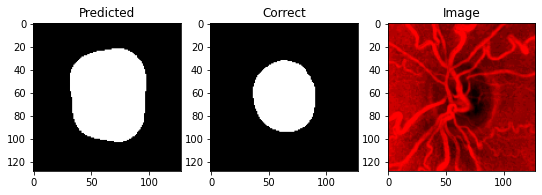

IOU: 0.5915243029594421
Dice: 0.7433430921511223
image #49


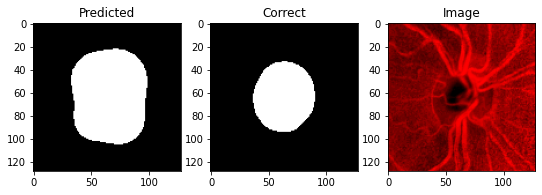

IOU: 0.5563273429870605
Dice: 0.7149232914923291
image #50


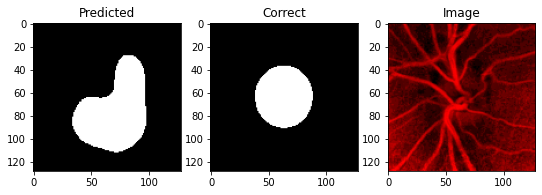

IOU: 0.3389090895652771
Dice: 0.5062466051059207


In [13]:
pred_iou, pred_dice, pred_disc = predict(hue_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.49949598
0.658436683375277


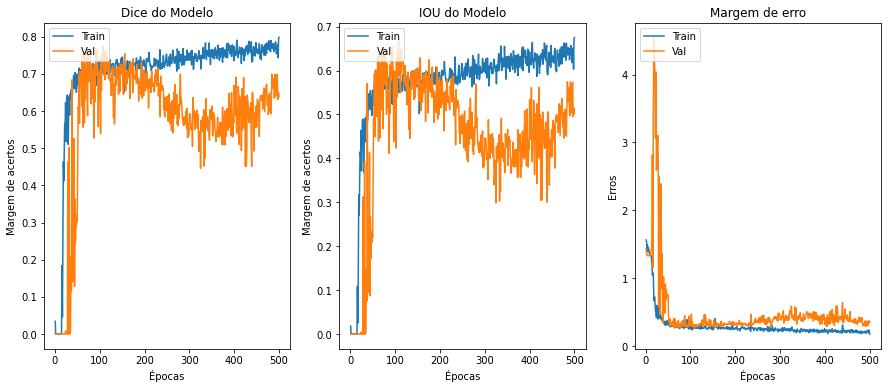

In [15]:
plot_results(history_cup, epochs)

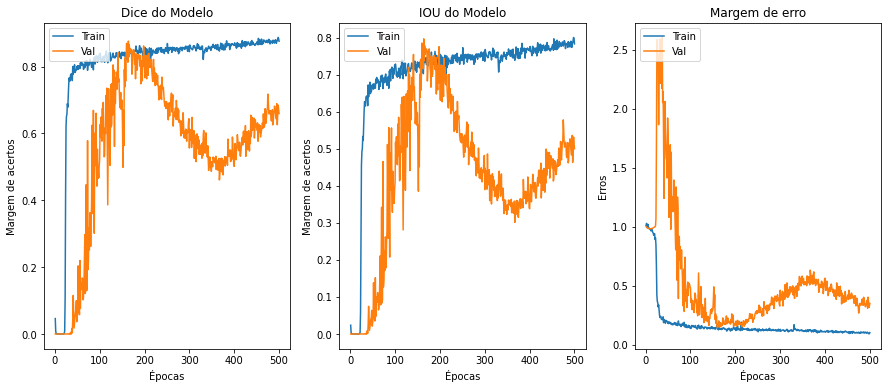

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.713244446822556
image #1 - cdr = 0.7330271228935845
image #2 - cdr = 0.6973022981064928
image #3 - cdr = 0.8965802755211807
image #4 - cdr = 0.6504381464336878
image #5 - cdr = 1.154193629585661
image #6 - cdr = 0.7219063938481816
image #7 - cdr = 0.8331685925107036
image #8 - cdr = 0.8202648295900222
image #9 - cdr = 0.8167608203331873
image #10 - cdr = 0.6331726272653702
image #11 - cdr = 0.6749360103475451
image #12 - cdr = 0.9211113103179069
image #13 - cdr = 0.6217938402806825
image #14 - cdr = 0.6812917005232128
image #15 - cdr = 0.6796584711804673
image #16 - cdr = 0.6562034825184861
image #17 - cdr = 0.66005172124916
image #18 - cdr = 0.597240302283581
image #19 - cdr = 0.6659868751904957
image #20 - cdr = 0.8215049293777299
image #21 - cdr = 0.6432121063223304
image #22 - cdr = 0.6599964616373101
image #23 - cdr = 0.6171574790489515
image #24 - cdr = 0.7469349458479281
image #25 - cdr = 0.6166079034594312
image #26 - cdr = 0.6962754814168213
image #27 - cdr 

In [18]:
pd.DataFrame(data= result)

cdr      area
0   0.713244  0.512642
1   0.733027  0.500712
2   0.697302  0.528653
3   0.896580  0.616712
4   0.650438  0.488752
5   1.154194  0.679620
6   0.721906  0.475839
7   0.833169  0.627628
8   0.820265  0.574178
9   0.816761  0.507317
10  0.633173  0.451437
11  0.674936  0.469845
12  0.921111  0.759019
13  0.621794  0.436853
14  0.681292  0.482482
15  0.679658  0.474924
16  0.656203  0.445627
17  0.660052  0.497361
18  0.597240  0.454434
19  0.665987  0.471413
20  0.821505  0.557701
21  0.643212  0.167984
22  0.659996  0.443242
23  0.617157  0.420409
24  0.746935  0.487618
25  0.616608  0.405577
26  0.696275  0.462881
27  0.771515  0.615451
28  0.969296  0.629764
29  0.631075  0.471104
30  0.644699  0.420478
31  0.741228  0.473072
32  0.722618  0.482192
33  0.767929  0.498096
34  0.658416  0.492710
35  0.721774  0.500554
36  0.586051  0.433440
37  0.618145  0.440987
38  0.677134  0.469567
39  0.629808  0.444348
40  0.613244  0.426678
41  0.850492  0.621789
42  0.730041  0.516851
43  0.627984  0.460217
44  0.628382  0.439593
45  0.685117  0.406994
46  0.899880  0.597856
47  0.775878  0.628149
48  0.682654  0.469048
49  0.626792  0.447146
50  1.553222  1.191258

In [19]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm    cup - dM  disc - dm  disc - dM
0   51.822262   60.612190  71.845985  84.980949
1   48.366943   56.407005  70.248894  76.950775
2   49.400978   55.603634  64.825096  79.741074
3   55.252716   78.062050  71.121902  87.066437
4   53.083225   56.112999  70.460640  86.269539
5   47.287189  101.591019  70.925209  88.019043
6   46.832500   63.902050  71.045013  88.518471
7   61.280216   72.495323  74.214264  87.011589
8   47.508160   70.664001  69.255249  86.147789
9   39.940636   60.996639  63.342052  74.681152
10  47.705631   56.737068  66.564575  89.607582
11  46.600384   59.792450  67.288925  88.589806
12  71.172676   77.845726  73.787956  84.512833
13  47.650013   54.450714  70.758575  87.570366
14  46.278259   58.390865  65.673988  85.706116
15  46.448593   60.795189  66.303383  89.449615
16  49.410294   56.368496  71.688202  85.900940
17  52.255562   56.144058  71.603477  85.060089
18  50.571785   53.169743  70.889542  89.025711
19  48.023861   57.863560  68.095680  86.883934
20  52.628830   69.057037  71.308105  84.061623
21   8.422359   13.397767  15.396928  20.829470
22  47.824543   56.183201  71.202957  85.126518
23  48.857460   52.595894  71.310425  85.222809
24  45.483807   61.625797  69.196884  82.504906
25  44.656181   54.124500  71.407738  87.777824
26  47.734901   57.684967  70.134140  82.847908
27  57.772041   64.188690  71.843956  83.198257
28  48.466656   81.256660  71.619797  83.830589
29  52.613873   53.489227  70.936249  84.758896
30  47.409576   55.188560  72.907120  85.603638
31  45.008148   63.461117  69.593079  85.616165
32  47.439438   61.054836  71.266708  84.491203
33  46.142857   65.949928  70.810806  85.880280
34  49.812496   55.550949  71.083931  84.370598
35  45.307346   64.834229  65.020821  89.826195
36  50.367397   52.491722  67.710358  89.568542
37  48.299274   53.692539  69.045471  86.860687
38  47.786449   55.533806  67.466484  82.012993
39  49.010647   53.692715  69.975975  85.252457
40  47.897408   54.469288  67.825592  88.821541
41  61.807964   70.949120  72.151237  83.421272
42  47.102867   56.520538  66.064621  77.421036
43  46.918423   55.792366  64.260559  88.843620
44  50.490257   53.010464  71.937347  84.360237
45  44.038654   57.268047  74.436043  83.588707
46  44.851303   76.267700  70.732422  84.753235
47  58.797588   63.887432  72.021225  82.342072
48  47.266491   57.403835  68.909622  84.089195
49  49.033226   54.384010  68.439003  86.765678
50  55.201618  134.126099  58.153671  86.353455